In [99]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics                          #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

df = pd.read_csv(r"C:\Users\SAkela\lidl\candy-data.txt");

X = df.drop(["winpercent","competitorname"],1)   #Feature Matrix
y = df["winpercent"]          #Target Variable

print(X.head())
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

#checking the correlation matrix
corr_matrix = df.corr()
a = corr_matrix["winpercent"].sort_values(ascending=False)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(len(X_train),len(y_train),len(X_test),len(y_test))


y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)


   chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
0          1       0        1               0       0                 1     0   
1          1       0        0               0       1                 0     0   
2          0       0        0               0       0                 0     0   
3          0       0        0               0       0                 0     0   
4          0       1        0               0       0                 0     0   

   bar  pluribus  sugarpercent  pricepercent  
0    1         0         0.732         0.860  
1    1         0         0.604         0.511  
2    0         0         0.011         0.116  
3    0         0         0.011         0.511  
4    0         0         0.906         0.511  
59 59 26 26


Feature ranking:
11
1. feature 9 (0.336533)
2. feature 10 (0.298916)
3. feature 8 (0.063622)
4. feature 3 (0.049071)
5. feature 2 (0.048142)
6. feature 6 (0.044582)
7. feature 0 (0.043344)
8. feature 1 (0.041950)
9. feature 5 (0.031889)
10. feature 7 (0.024613)
11. feature 4 (0.017337)


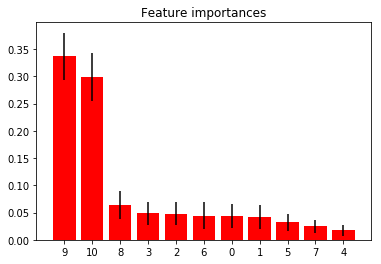

In [100]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=85,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
print(X.shape[1])
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))